# Model Selection

## Score and cross-validated scores

Every estimator exposes a `score` method that can judge the quality of the fit or prediction on new data.

In [1]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

We can split the data in folds that we use for training and testing to get a better measure of prediction accuracy.

This is called K-Fold cross validation

In [16]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = []
for k in range(0, 3):
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
scores

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

In [17]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
kf = KFold(n_splits=5)
for train_indices, test_indices in kf.split(X):
    print(f"Train indices: {train_indices}, test indices: {test_indices}")

Train indices: [2 3 4 5 6 7 8 9], test indices: [0 1]
Train indices: [0 1 4 5 6 7 8 9], test indices: [2 3]
Train indices: [0 1 2 3 6 7 8 9], test indices: [4 5]
Train indices: [0 1 2 3 4 5 8 9], test indices: [6 7]
Train indices: [0 1 2 3 4 5 6 7], test indices: [8 9]


In [18]:
# Easy for cross-validation:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test]) for train, test in kf.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

In [21]:
# Can be computed directly
cross_val_score(svc, X_digits, y_digits, cv=kf, n_jobs=-1) # -1 specifies to use all CPUs

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

In [22]:
# Defaults to score -- provide alternative scoring method as such:
cross_val_score(svc, X_digits, y_digits, cv=kf, scoring='precision_macro')

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

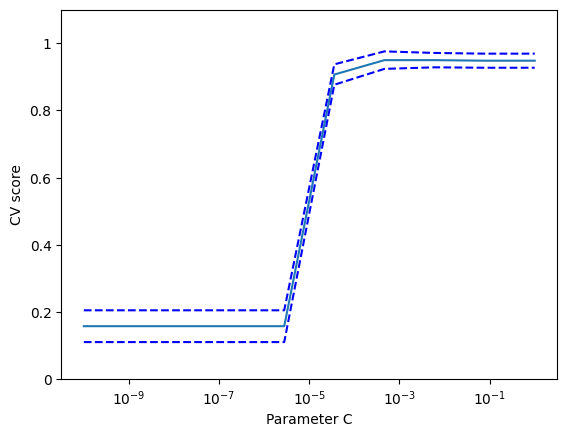

In [40]:
import matplotlib.pyplot as plt
X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel="linear")
C_s = np.logspace(-10, 0, 10)

cv_scores = []

for c in range(1, 11):
    svc.C = c
    cv_scores.append(np.mean(cross_val_score(svc, X_digits, y_digits, cv=kf, n_jobs=-1)))
    
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), "b--")
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), "b--")
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel("CV score")
plt.xlabel("Parameter C")
plt.ylim(0, 1.1)
plt.show()

## Grid search 